In [1]:
#Import Modules to Code
import numpy
import numpy as np
import math as m
from scipy import integrate
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import quad, dblquad
import scipy.special as sp
import scipy.constants as cn
import numpy
import numpy as np
import math as m
from scipy import integrate
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import quad, dblquad
import scipy.constants as cn
import scipy.special as sp
import astropy.units as u
from agnpy.emission_regions import Blob
from agnpy.synchrotron import Synchrotron
from agnpy.utils.plot import plot_sed
from numpy import linspace, random
from scipy.optimize import leastsq

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width: 100% !important; }</style>"))

In [3]:
##Physical Constants
kpc = 3.085677558128*10**21
pc = 3.085677558128*10**18
fortio =4.80*10**(-10)
c = 2.997925*10**10
me =9.109*10**(-28)
mp = 1.672614*10**(-24)
hpl = 6.25*10**(-27)
Ro=50*pc
d_L= 18.5*10**3*kpc#(source luminosity distance):1.00e+27 cm
B=0.001 #s.f.p

In [4]:
##Free Parameters
gmin_e = 1.2*10**5
gmax_e = 10**6

gmin_p = 3*10**4
gmax_p = 3*10**5

ps_e = 4.4
ps_p = 2

No_e=6.5*10**50 #f.p
No_p=1.5*10**56

In [5]:
##Power estimation
#Electrons power [erg/s]
def p_e(n):
    res = dblquad(lambda x, g: ((No_e*(-ps_e+1)/((me*c**2)**(-ps_e+1)*(gmax_e**(-ps_e+1)-gmin_e**(-ps_e+1)))*4*cn.pi*fortio**2*me*c*(me*c**2)**(-ps_e))/3)*n*g**(-2-ps_e)*(9+36*x**2+16*x**4)/((3+4*x**2)*m.sqrt(1+(x**2)/3))*np.exp(-n*4*cn.pi*me*c*(1+(4*x**2)/3)*m.sqrt(1+x**2/3)/(g**2*3*fortio*B)), gmin_e, gmax_e, lambda x: 0, lambda x: np.inf)
    return res

v = numpy.logspace(10,17,100)
       

In [6]:
#Absorption Part
def abs_e(n,Ro):      
    res = dblquad(lambda x, g: No_e*(-ps_e+1)/(4*cn.pi*Ro**3*(me*c**2)**(-ps_e+1)*(gmax_e**(-ps_e+1)-gmin_e**(-ps_e+1)))*(ps_e+2)*fortio**2*(me*c**2)**(-ps_e)*c/(6)*(g**(-ps_e-3)/n)*(9+36*x**2+16*x**4)/((3+4*x**2)*m.sqrt(1+(x**2)/3))*np.exp(-n*4*cn.pi*me*c*(1+(4*x**2)/3)*m.sqrt(1+x**2/3)/(g**2*3*fortio*B)), gmin_e, gmax_e, lambda x: 0, lambda x: np.inf, epsabs=1.49e-28, epsrel=1.49e-18)
    return res

def fabs_e(n,Ro): 
    res =  cn.pi*Ro**2*p_e(n)[0]*(-np.expm1(-abs_e(n,Ro)[0]*Ro))/(d_L**2*(4*cn.pi)**2*Ro**3*abs_e(n,Ro)[0])        
    return res
    
Fabs1_e=v*0
Fabs2_e=v*0
Fabs3_e=v*0
        
   

In [7]:
for i in range(len(v)):
    Fabs1_e[i]=fabs_e(v[i],10**10)
    Fabs2_e[i]=fabs_e(v[i],10**11)
    Fabs3_e[i]=fabs_e(v[i],10**12)
    

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:879: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


In [8]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

Text(0.5, 1.0, 'Synchrotron Spectra for power law distribution')

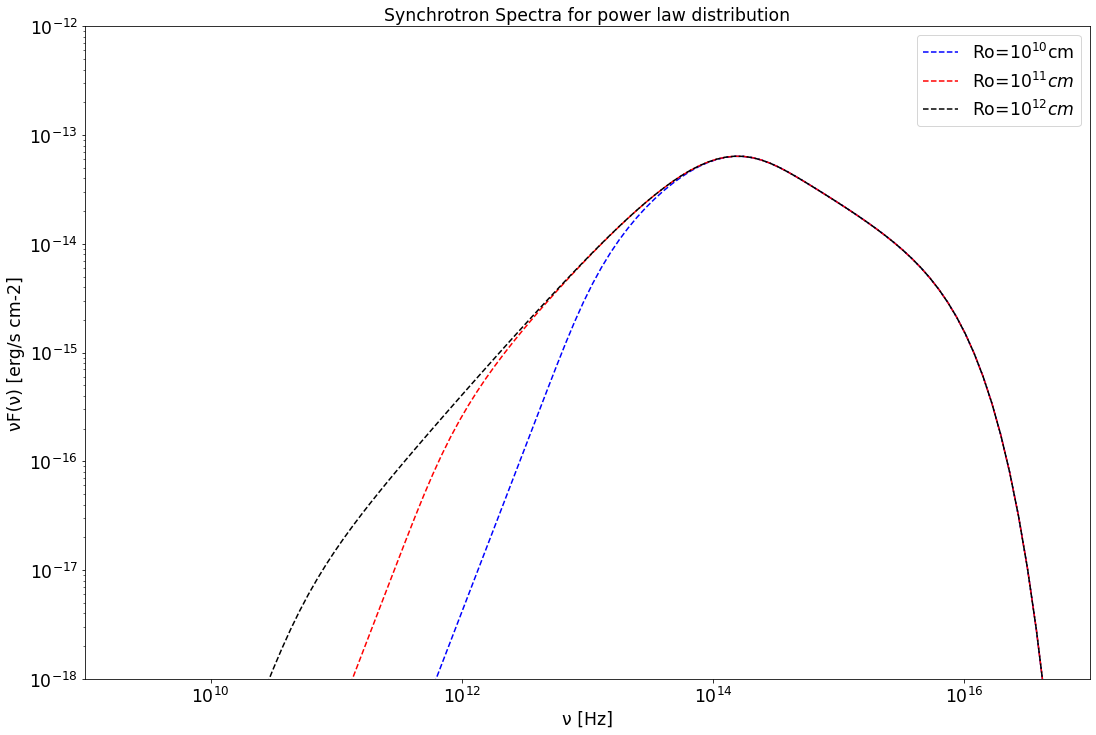

In [9]:
plt.figure(figsize=(18,12))    

plt.plot(v,v*Fabs1_e , label='Ro=$10^{10}$cm',ls="--", color="blue")
plt.plot(v,v*Fabs2_e, label='Ro=$10^{11}cm$',ls="--", color="red")
plt.plot(v,v*Fabs3_e, label='Ro=$10^{12}cm$',ls="--", color="black")
plt.legend()


plt.ylim(1e-18,1e-12)
plt.xlim(1e9,1e17)
plt.xlabel("ν [Hz]")
plt.ylabel("νF(ν) [erg/s cm-2]")
plt.yscale("log")
plt.xscale("log")
#plt.scatter(dv,nFn)
plt.title("Synchrotron Spectra for power law distribution")    
    
